In [1]:
import numpy as np
import tensorflow as tf
import keras

Using TensorFlow backend.


In [2]:
from keras.models import Model
from keras.layers import Dense, Embedding, Dropout,Flatten,Concatenate, Masking
from keras.layers import LSTM
from sklearn.model_selection import train_test_split

In [3]:
# If GPU is not available: 
# GPU_USE = '/cpu:0'
# config = tf.ConfigProto(device_count = {"GPU": 0})


# If GPU is available: 
config = tf.ConfigProto()
config.log_device_placement = True
config.allow_soft_placement = True
config.gpu_options.allocator_type = 'BFC'
config.gpu_options.allow_growth = True

# Limit the maximum memory used
config.gpu_options.per_process_gpu_memory_fraction = 0.9

# set session config
tf.keras.backend.set_session(tf.Session(config=config))

In [77]:
#input data
import os
data_dir = "/home/niteesh/Documents/uni/HCI/Saarland/Npy_files/"
files = os.listdir(data_dir)
for f in files:
    file = data_dir + f
    if f== files[0]:
        data = np.load(file)
    else:
        data = np.vstack((data,np.load(file)))
        
data = np.load(data_dir + "17.npy")
print(data.shape)

(503, 16, 2)


In [113]:
#Hyper-parameters, constants
max_length_saccades = 5
learning_rate=0.01

In [114]:
#format data
Input = data[:,0:max_length_saccades,:]
y = data[:,-1,:]
print(Input.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(Input, y, test_size=0.33)


(503, 5, 2)
(503, 2)


In [143]:
optimizer = keras.optimizers.RMSprop(lr=learning_rate)
model = keras.models.Sequential()

layer1 = model.add(Masking(mask_value=np.inf, input_shape=(max_length_saccades, 2),name = 'mask_layer'))
layer2 = model.add(LSTM(32, return_sequences=True,))

layer3 = model.add(LSTM(32,return_sequences=False,))  
# returns a sequence of vectors of dimension 32

#model.add(Dropout(0.5))
#model.add(LSTM(8, return_sequences=True))  
# returns a sequence of vectors of dimension 32


#layer4 = model.add(Dropout(0.3))

model.add(Dense(16, activation='relu'))

output_layer = model.add(Dense(2, activation='linear',name = 'output_layers'))
#output_layer = model.add(LSTM(2,activation=None,return_sequences=False)) 

# try using different optimizers and different optimizer configs
#model.compile(loss='mse',optimizer=optimizer,metrics=['mse'])

model.compile(loss='mse',
              optimizer=optimizer,)
# Print summary
model.summary()
print("Inputs: {}".format(model.input_shape))
print("Outputs: {}".format(model.output_shape))
print("Actual input: {}".format(Input.shape))
print("Actual output: {}".format(y.shape))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mask_layer (Masking)         (None, 5, 2)              0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 5, 32)             4480      
_________________________________________________________________
lstm_68 (LSTM)               (None, 32)                8320      
_________________________________________________________________
dense_31 (Dense)             (None, 16)                528       
_________________________________________________________________
output_layers (Dense)        (None, 2)                 34        
Total params: 13,362
Trainable params: 13,362
Non-trainable params: 0
_________________________________________________________________
Inputs: (None, 5, 2)
Outputs: (None, 2)
Actual input: (503, 5, 2)
Actual output: (503, 2)


In [144]:
#Fit the model to data
history = model.fit(x = Input, y= y, batch_size= 32, epochs = 200, verbose = 1, validation_split = 0.1, shuffle = True  )

Train on 452 samples, validate on 51 samples
Epoch 1/200
452/452 [==============================] - 4s 9ms/step - loss: 1469435.5575 - val_loss: 1507019.7574
Epoch 2/200
452/452 [==============================] - 0s 506us/step - loss: 1395743.3108 - val_loss: 1419121.5907
Epoch 3/200
452/452 [==============================] - 0s 491us/step - loss: 1311596.4679 - val_loss: 1316652.2328
Epoch 4/200
452/452 [==============================] - 0s 508us/step - loss: 1213626.6283 - val_loss: 1199889.0968
Epoch 5/200
452/452 [==============================] - 0s 508us/step - loss: 1107557.8750 - val_loss: 1075957.7353
Epoch 6/200
452/452 [==============================] - 0s 491us/step - loss: 998919.8396 - val_loss: 950404.9510
Epoch 7/200
452/452 [==============================] - 0s 565us/step - loss: 893230.6571 - val_loss: 834934.9681
Epoch 8/200
452/452 [==============================] - 0s 540us/step - loss: 796995.3153 - val_loss: 725260.6630
Epoch 9/200
452/452 [======================

452/452 [==============================] - 0s 475us/step - loss: 481886.4491 - val_loss: 430003.1078
Epoch 73/200
452/452 [==============================] - 0s 472us/step - loss: 481193.7666 - val_loss: 387823.0349
Epoch 74/200
452/452 [==============================] - 0s 469us/step - loss: 481293.4375 - val_loss: 378043.9908
Epoch 75/200
452/452 [==============================] - 0s 467us/step - loss: 483468.2099 - val_loss: 387923.6850
Epoch 76/200
452/452 [==============================] - 0s 470us/step - loss: 482739.2013 - val_loss: 385040.7745
Epoch 77/200
452/452 [==============================] - 0s 465us/step - loss: 480045.4043 - val_loss: 379130.2506
Epoch 78/200
452/452 [==============================] - 0s 470us/step - loss: 482673.6256 - val_loss: 391888.7953
Epoch 79/200
452/452 [==============================] - 0s 484us/step - loss: 481959.3379 - val_loss: 384513.6121
Epoch 80/200
452/452 [==============================] - 0s 467us/step - loss: 480314.2118 - val_loss:

452/452 [==============================] - 0s 488us/step - loss: 481498.2035 - val_loss: 375883.6906
Epoch 144/200
452/452 [==============================] - 0s 459us/step - loss: 479404.1665 - val_loss: 377201.6838
Epoch 145/200
452/452 [==============================] - 0s 522us/step - loss: 478697.9840 - val_loss: 366971.9118
Epoch 146/200
452/452 [==============================] - 0s 491us/step - loss: 486172.2174 - val_loss: 382435.9810
Epoch 147/200
452/452 [==============================] - 0s 466us/step - loss: 479182.2564 - val_loss: 381274.8051
Epoch 148/200
452/452 [==============================] - 0s 492us/step - loss: 480147.2237 - val_loss: 402728.9436
Epoch 149/200
452/452 [==============================] - 0s 489us/step - loss: 479361.1150 - val_loss: 373582.7812
Epoch 150/200
452/452 [==============================] - 0s 483us/step - loss: 481567.2730 - val_loss: 379884.3615
Epoch 151/200
452/452 [==============================] - 0s 474us/step - loss: 483476.9726 - v

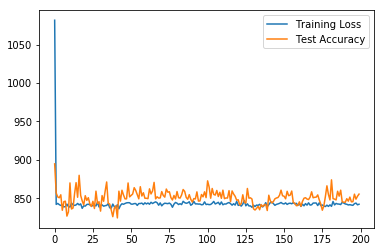

In [140]:
import matplotlib.pyplot as plt
l_test = np.sqrt(history.history['val_loss'])
l_train = np.sqrt(history.history['loss'])
plt.plot(l_train, label="Training Loss")
plt.plot(l_test, label="Test Accuracy")
plt.legend()

In [133]:
#model.outputs[0]
#m.outputs = 
y_pred = model.predict(Input)
print(y_pred[0:10])
print(y[0:10])

[[ 870.3426   483.09265]
 [ 870.3426   483.09265]
 [ 870.34393  483.09146]
 [1059.7368   568.0371 ]
 [1074.2274   554.0172 ]
 [ 870.3426   483.09265]
 [ 870.3426   483.09265]
 [ 870.34985  483.08813]
 [ 847.87683  500.42834]
 [1074.2275   554.0173 ]]
[[  213.546752    1053.5688    ]
 [   20.98096384  1066.34376   ]
 [  254.461824    1088.80128   ]
 [  249.230336    1201.69656   ]
 [  441.02784     1283.89248   ]
 [   46.387456    1351.27368   ]
 [  336.29056     1350.63504   ]
 [-1379.2768      -684.30672   ]
 [  910.53568     1021.3884    ]
 [ 1322.29632      820.76544   ]]


([array([  2.,   0.,   1.,   0.,   0.,   0.,  46.,   6.,   3., 445.]),
  array([  3.,   0.,   0., 495.,   5.,   0.,   0.,   0.,   0.,   0.])],
 array([ 170.22139,  270.43927,  370.65717,  470.87506,  571.09296,
         671.31085,  771.5287 ,  871.7466 ,  971.9645 , 1072.1824 ,
        1172.4003 ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

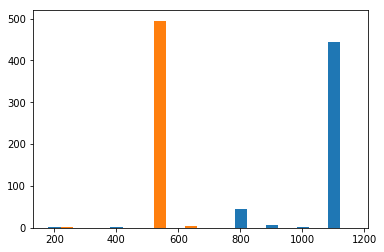

In [134]:
plt.hist(y_pred)

([array([  2.,   3.,   2.,  29., 337., 321., 240., 276.,   8.,   4.]),
  array([  0.,   0.,   3., 145., 485., 568.,  21.,   0.,   0.,   0.])],
 array([-2535.3984 , -1880.68864, -1225.97888,  -571.26912,    83.44064,
          738.1504 ,  1392.86016,  2047.56992,  2702.27968,  3356.98944,
         4011.6992 ]),
 <a list of 2 Lists of Patches objects>)

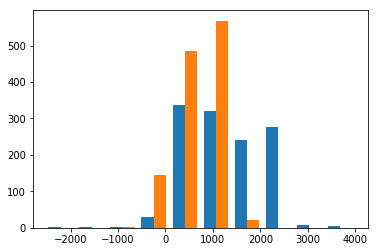

In [299]:
plt.hist(y)

In [95]:
layer_name = 'my_layer'
intermediate_layer_model = Model(inputs=model.input,
                                 outputs=model.get_layer('mask_layer').output)
intermediate_output = intermediate_layer_model.predict(Input[107:108])
print(intermediate_output)
print(Input[107:108])

[[[950.71747 817.4354 ]
  [956.105   816.6341 ]
  [949.5693  813.35016]
  [937.4784  813.0262 ]
  [911.65314 805.8622 ]
  [871.5379  816.5585 ]
  [      nan       nan]]]
[[[950.71744 817.43544]
  [956.10496 816.63408]
  [949.56928 813.35016]
  [937.4784  813.02616]
  [911.65312 805.86216]
  [871.53792 816.55848]
  [      inf       inf]]]


In [520]:
model.get_layer('masking_30')

In [538]:
Input[0:1].shape


(1, 6, 2)

In [19]:
history.history

{'val_loss': [1579796.705882353,
  1579553.3946078431,
  1579275.7083333333,
  1579000.8848039217,
  1578702.931372549,
  1578393.8995098039,
  1578038.7745098039,
  1577697.012254902,
  1577373.3406862745,
  1577030.9534313725,
  1576676.9411764706,
  1576311.6715686275,
  1575965.4632352942,
  1575604.5637254901,
  1575267.1348039217,
  1574929.8284313725,
  1574596.4093137255,
  1574264.6102941176,
  1573941.7426470588,
  1573619.9460784313,
  1573299.9142156863,
  1572995.556372549,
  1572689.5906862745,
  1572395.9044117648,
  1572099.556372549,
  1571808.0710784313,
  1571516.3578431373,
  1571232.9117647058,
  1570951.2916666667,
  1570691.6838235294,
  1570431.7034313725,
  1570180.7303921569,
  1569928.056372549,
  1569678.4289215687,
  1569440.3357843137,
  1569210.5196078431,
  1568982.281862745,
  1568765.669117647,
  1568553.7450980393,
  1568357.7401960783,
  1568153.9485294118,
  1567946.2132352942,
  1567759.4852941176,
  1567569.693627451,
  1567395.2401960783,
  15672